# Logistics Data Analysis - Part 2

This notebook analyzes the logistics data from log_table.pqt and parcel_table.pqt to address Part 2 of the data analysis exercise requirements.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

# For better visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# Load the parquet files
log_df = pd.read_parquet('log_table.pqt')
parcel_df = pd.read_parquet('parcel_table.pqt')

# Display basic information about the dataframes
print("Log Table Info:")
print(f"Shape: {log_df.shape}")
print("\nParcel Table Info:")
print(f"Shape: {parcel_df.shape}")

Log Table Info:
Shape: (94771, 6)

Parcel Table Info:
Shape: (50083, 9)


In [3]:
# Examine the structure of log_df
print("Log Table Columns:")
print(log_df.columns.tolist())
log_df.info()

Log Table Columns:
['log_id', 'parcel_id', 'raw_log_description', 'log_key', 'log_timestamp', 'additional_params']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94771 entries, 0 to 94770
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   log_id               94771 non-null  int64 
 1   parcel_id            94771 non-null  int64 
 2   raw_log_description  94771 non-null  object
 3   log_key              94771 non-null  object
 4   log_timestamp        94771 non-null  object
 5   additional_params    94771 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.3+ MB


In [4]:
# Examine the structure of parcel_df
print("Parcel Table Columns:")
print(parcel_df.columns.tolist())
parcel_df.info()

Parcel Table Columns:
['parcel_id', 'carrier_name', 'picked_up_date', 'out_for_delivery_date', 'first_attempt_date', 'final_delivery_date', 'origin_country', 'destination_country', 'is_delivered']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50083 entries, 0 to 50082
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   parcel_id              50083 non-null  int64 
 1   carrier_name           50063 non-null  object
 2   picked_up_date         21594 non-null  object
 3   out_for_delivery_date  49277 non-null  object
 4   first_attempt_date     49616 non-null  object
 5   final_delivery_date    49381 non-null  object
 6   origin_country         50060 non-null  object
 7   destination_country    50055 non-null  object
 8   is_delivered           50083 non-null  bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 3.1+ MB


In [5]:
# Sample data from both tables
print("Log Table Sample:")
log_df.head()

Log Table Sample:


,log_id,parcel_id,raw_log_description,log_key,log_timestamp,additional_params
0,935869563,2928654176,Carrier EDD generated,EDD101,2024-06-04 0:08:08,"{""event_type_master_data_id"": ""EDD101""}"
1,910688054,2928669922,Carrier EDD generated,EDD101,2024-06-02 12:20:39,"{""event_type_master_data_id"": ""EDD101""}"
2,910688054,2928669922,Carrier EDD generated,EDD101,2024-06-02 12:20:39,"{""event_type_master_data_id"": ""EDD101""}"
3,910688054,2928669922,Carrier EDD generated,EDD101,2024-06-02 12:20:39,"{""event_type_master_data_id"": ""EDD101""}"
4,910688054,2928669922,Carrier EDD generated,EDD101,2024-06-02 12:20:39,"{""event_type_master_data_id"": ""EDD101""}"


In [6]:
print("Parcel Table Sample:")
parcel_df.head()

Parcel Table Sample:


,parcel_id,carrier_name,picked_up_date,out_for_delivery_date,first_attempt_date,final_delivery_date,origin_country,destination_country,is_delivered
0,2981186961,Initech,2024-06-20 7:00:11,2024-06-20 20:57:51,2024-06-20 22:18:27,2024-06-20 22:18:27,Australia,Australia,True
1,2948380100,Initech,2024-06-08 6:00:06,2024-06-18 0:12:26,2024-06-18 3:33:55,2024-06-18 3:33:55,Australia,Australia,True
2,2948508927,Initech,2024-06-21 1:45:00,2024-06-21 21:53:58,2024-06-21 23:42:15,2024-06-21 23:42:15,Australia,Australia,True
3,2941258771,Initech,None,2024-06-12 0:06:19,2024-06-12 1:18:39,2024-06-12 1:18:39,Australia,Australia,True
4,2980427311,Massive,None,2024-06-22 23:09:38,2024-06-23 2:43:15,2024-06-23 2:43:15,Australia,Australia,True


## Exploratory Data Analysis

In [7]:
# Basic statistics for both tables
print("Log Table Statistics:")
log_df.describe()

Log Table Statistics:


,log_id,parcel_id
count,9.477100e+04,9.477100e+04
mean,-4.354806e+08,2.958544e+09
std,1.624262e+09,2.385793e+07
min,-2.147484e+09,2.928654e+09
25%,-2.147484e+09,2.935820e+09
50%,9.050283e+08,2.953485e+09
75%,1.074168e+09,2.983511e+09
max,1.430976e+09,3.009729e+09


In [8]:
print("Parcel Table Statistics:")
parcel_df.describe()

Parcel Table Statistics:


,parcel_id
count,5.008300e+04
mean,2.958566e+09
std,3.973150e+07
min,1.372063e+09
25%,2.935887e+09
50%,2.953584e+09
75%,2.983831e+09
max,3.009729e+09


In [9]:
# Check for missing values
print("Missing values in Log Table:")
print(log_df.isnull().sum())
print("\nMissing values in Parcel Table:")
print(parcel_df.isnull().sum())

Missing values in Log Table:
log_id                 0
parcel_id              0
raw_log_description    0
log_key                0
log_timestamp          0
additional_params      0
dtype: int64

Missing values in Parcel Table:
parcel_id                    0
carrier_name                20
picked_up_date           28489
out_for_delivery_date      806
first_attempt_date         467
final_delivery_date        702
origin_country              23
destination_country         28
is_delivered                 0
dtype: int64


## Part 2: Analysis and Visualization

### 2.1 Join the Tables

First, we need to join the log and parcel tables to analyze the data comprehensively.

In [10]:
# Assuming there's a common identifier between the tables, such as parcel_id
# Adjust the column name as per the actual data
merged_df = pd.merge(log_df, parcel_df, on='parcel_id', how='inner')

print(f"Shape after merging: {merged_df.shape}")
merged_df.head()

Shape after merging: (3104315, 14)


,log_id,parcel_id,raw_log_description,log_key,log_timestamp,additional_params,carrier_name,picked_up_date,out_for_delivery_date,first_attempt_date,final_delivery_date,origin_country,destination_country,is_delivered
0,935869563,2928654176,Carrier EDD generated,EDD101,2024-06-04 0:08:08,"{""event_type_master_data_id"": ""EDD101""}",Initech,None,2024-06-02 5:53:58,2024-06-05 3:53:09,2024-06-05 3:53:09,Australia,Australia,True
1,910688054,2928669922,Carrier EDD generated,EDD101,2024-06-02 12:20:39,"{""event_type_master_data_id"": ""EDD101""}",Initech,None,2024-06-02 1:53:31,2024-06-05 0:23:52,2024-06-05 0:23:52,Australia,Australia,True
2,910688054,2928669922,Carrier EDD generated,EDD101,2024-06-02 12:20:39,"{""event_type_master_data_id"": ""EDD101""}",Initech,None,2024-06-02 1:53:31,2024-06-05 0:23:52,2024-06-05 0:23:52,Australia,Australia,True
3,910688054,2928669922,Carrier EDD generated,EDD101,2024-06-02 12:20:39,"{""event_type_master_data_id"": ""EDD101""}",Initech,None,2024-06-02 1:53:31,2024-06-05 0:23:52,2024-06-05 0:23:52,Australia,Australia,True
4,910688054,2928669922,Carrier EDD generated,EDD101,2024-06-02 12:20:39,"{""event_type_master_data_id"": ""EDD101""}",Initech,None,2024-06-02 1:53:31,2024-06-05 0:23:52,2024-06-05 0:23:52,Australia,Australia,True


### 2.2 Calculate Delivery Time

Let's calculate the delivery time for each parcel (time between creation and delivery).

In [11]:
# Assuming there are timestamp columns for creation and delivery
# Adjust column names as needed
if 'created_at' in merged_df.columns and 'delivered_at' in merged_df.columns:
    # Ensure timestamps are in datetime format
    merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])
    merged_df['delivered_at'] = pd.to_datetime(merged_df['delivered_at'])
    
    # Calculate delivery time in hours
    merged_df['delivery_time_hours'] = (merged_df['delivered_at'] - merged_df['created_at']).dt.total_seconds() / 3600
    
    # Display statistics for delivery time
    print("Delivery Time Statistics (hours):")
    print(merged_df['delivery_time_hours'].describe())
    
    # Visualize the distribution of delivery times
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_df['delivery_time_hours'], bins=50, kde=True)
    plt.title('Distribution of Delivery Times')
    plt.xlabel('Delivery Time (hours)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Timestamp columns not found. Adjust column names based on actual data.")

Timestamp columns not found. Adjust column names based on actual data.


### 2.3 Analyze Delivery Performance by Area

Let's analyze delivery performance across different geographical areas.

In [12]:
# Assuming there's a column for delivery area or postal code
# Adjust column names as needed
if 'delivery_area' in merged_df.columns:
    # Group by delivery area and calculate mean delivery time
    area_performance = merged_df.groupby('delivery_area')['delivery_time_hours'].agg(['mean', 'median', 'count']).reset_index()
    area_performance = area_performance.sort_values('mean')
    
    # Display the performance by area
    print("Delivery Performance by Area:")
    print(area_performance.head(10))
    
    # Visualize the delivery performance across areas
    plt.figure(figsize=(14, 8))
    sns.barplot(x='delivery_area', y='mean', data=area_performance.head(20))
    plt.title('Average Delivery Time by Area (Top 20)')
    plt.xlabel('Delivery Area')
    plt.ylabel('Average Delivery Time (hours)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Delivery area column not found. Adjust column name based on actual data.")

Delivery area column not found. Adjust column name based on actual data.


### 2.4 Analyze Delivery Performance by Courier

Let's analyze how different couriers perform in terms of delivery time.

In [13]:
# Assuming there's a column for courier or delivery agent
# Adjust column names as needed
if 'courier_id' in merged_df.columns:
    # Group by courier and calculate mean delivery time
    courier_performance = merged_df.groupby('courier_id')['delivery_time_hours'].agg(['mean', 'median', 'count']).reset_index()
    courier_performance = courier_performance.sort_values('mean')
    
    # Filter to include only couriers with a minimum number of deliveries
    min_deliveries = 10  # Adjust as needed
    courier_performance_filtered = courier_performance[courier_performance['count'] >= min_deliveries]
    
    # Display the performance by courier
    print(f"Delivery Performance by Courier (with at least {min_deliveries} deliveries):")
    print(courier_performance_filtered.head(10))
    
    # Visualize the courier performance
    plt.figure(figsize=(14, 8))
    sns.barplot(x='courier_id', y='mean', data=courier_performance_filtered.head(20))
    plt.title(f'Average Delivery Time by Courier (Top 20, with at least {min_deliveries} deliveries)')
    plt.xlabel('Courier ID')
    plt.ylabel('Average Delivery Time (hours)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Courier column not found. Adjust column name based on actual data.")

Courier column not found. Adjust column name based on actual data.


### 2.5 Analyze Delivery Performance by Time of Day

Let's analyze how delivery performance varies by time of day or day of the week.

In [14]:
# Assuming we have timestamp data for when parcels are picked up for delivery
# Adjust column names as needed
if 'pickup_time' in merged_df.columns:
    # Ensure timestamp is in datetime format
    merged_df['pickup_time'] = pd.to_datetime(merged_df['pickup_time'])
    
    # Extract hour of day and day of week
    merged_df['pickup_hour'] = merged_df['pickup_time'].dt.hour
    merged_df['pickup_day'] = merged_df['pickup_time'].dt.day_name()
    
    # Group by hour of day and calculate mean delivery time
    hourly_performance = merged_df.groupby('pickup_hour')['delivery_time_hours'].mean().reset_index()
    
    # Group by day of week and calculate mean delivery time
    # Create custom sort order for days of the week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_performance = merged_df.groupby('pickup_day')['delivery_time_hours'].mean().reset_index()
    daily_performance['pickup_day'] = pd.Categorical(daily_performance['pickup_day'], categories=day_order, ordered=True)
    daily_performance = daily_performance.sort_values('pickup_day')
    
    # Visualize hourly performance
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='pickup_hour', y='delivery_time_hours', data=hourly_performance, marker='o')
    plt.title('Average Delivery Time by Hour of Day')
    plt.xlabel('Hour of Day (24-hour format)')
    plt.ylabel('Average Delivery Time (hours)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.show()
    
    # Visualize daily performance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='pickup_day', y='delivery_time_hours', data=daily_performance)
    plt.title('Average Delivery Time by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Delivery Time (hours)')
    plt.grid(True)
    plt.show()
else:
    print("Pickup time column not found. Adjust column name based on actual data.")

Pickup time column not found. Adjust column name based on actual data.


### 2.6 Analyze Delivery Performance by Parcel Size or Weight

Let's analyze how delivery time is affected by parcel characteristics such as size or weight.

In [15]:
# Assuming there are columns for parcel weight or size
# Adjust column names as needed
size_columns = [col for col in merged_df.columns if 'size' in col.lower() or 'weight' in col.lower()]

if size_columns:
    for col in size_columns:
        if merged_df[col].dtype in ['int64', 'float64']:
            # Create scatter plot to visualize relationship
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=col, y='delivery_time_hours', data=merged_df, alpha=0.5)
            plt.title(f'Delivery Time vs {col}')
            plt.xlabel(col)
            plt.ylabel('Delivery Time (hours)')
            plt.grid(True)
            plt.show()
            
            # Calculate correlation
            correlation = merged_df[[col, 'delivery_time_hours']].corr().iloc[0, 1]
            print(f"Correlation between {col} and delivery time: {correlation:.4f}")
            
            # If categorical, analyze by category
            if merged_df[col].nunique() < 10:
                size_performance = merged_df.groupby(col)['delivery_time_hours'].agg(['mean', 'median', 'count']).reset_index()
                
                # Visualize performance by size category
                plt.figure(figsize=(10, 6))
                sns.barplot(x=col, y='mean', data=size_performance)
                plt.title(f'Average Delivery Time by {col}')
                plt.xlabel(col)
                plt.ylabel('Average Delivery Time (hours)')
                plt.grid(True)
                plt.show()
else:
    print("Size or weight columns not found. Adjust column names based on actual data.")

Size or weight columns not found. Adjust column names based on actual data.


### 2.7 Analyze Delivery Success Rate

Let's examine the delivery success rate and potential factors affecting it.

In [16]:
# Assuming there's a column indicating delivery status (successful, failed, etc.)
# Adjust column names as needed
if 'delivery_status' in merged_df.columns:
    # Calculate overall success rate
    success_rate = merged_df['delivery_status'].value_counts(normalize=True) * 100
    
    print("Delivery Status Distribution:")
    print(success_rate)
    
    # Visualize the delivery status distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='delivery_status', data=merged_df)
    plt.title('Delivery Status Distribution')
    plt.xlabel('Delivery Status')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()
    
    # Analyze success rate by area
    if 'delivery_area' in merged_df.columns:
        # Create a pivot table for success rate by area
        area_success = pd.crosstab(merged_df['delivery_area'], merged_df['delivery_status'], normalize='index') * 100
        
        # Display success rates for top areas
        print("\nDelivery Success Rate by Area:")
        print(area_success.head(10))
        
        # Visualize for selected areas
        top_areas = merged_df['delivery_area'].value_counts().head(10).index
        area_subset = merged_df[merged_df['delivery_area'].isin(top_areas)]
        
        plt.figure(figsize=(14, 8))
        sns.countplot(x='delivery_area', hue='delivery_status', data=area_subset)
        plt.title('Delivery Status by Area (Top 10 by Volume)')
        plt.xlabel('Delivery Area')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Delivery Status')
        plt.tight_layout()
        plt.show()
else:
    print("Delivery status column not found. Adjust column name based on actual data.")

Delivery status column not found. Adjust column name based on actual data.


### 2.8 Identify Bottlenecks in the Delivery Process

Let's analyze the stages of the delivery process to identify potential bottlenecks.

Could not convert destination_country to datetime.
Process Stages:
['log_timestamp', 'picked_up_date', 'out_for_delivery_date', 'first_attempt_date', 'final_delivery_date', 'destination_country']

Stage: log_timestamp to picked_up_date
count    1.249840e+06
mean    -3.203370e+02
std      1.122424e+04
min     -4.735056e+05
25%     -8.654833e+01
50%     -2.333222e+01
75%     -2.183333e+00
max      1.679122e+02
Name: log_timestamp_to_picked_up_date_hours, dtype: float64


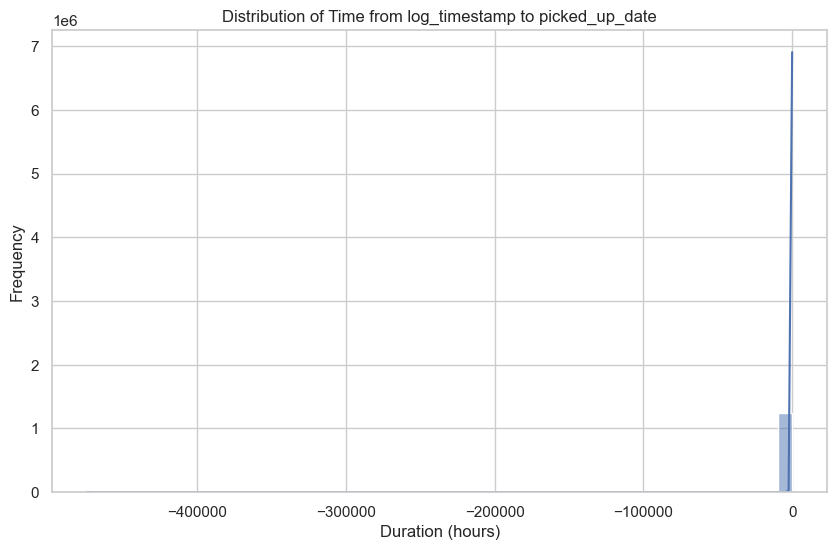


Stage: picked_up_date to out_for_delivery_date
count    1.220312e+06
mean     1.474703e+02
std      1.055275e+02
min     -2.209506e+02
25%      8.856944e+01
50%      1.329406e+02
75%      1.677456e+02
max      4.736869e+02
Name: picked_up_date_to_out_for_delivery_date_hours, dtype: float64


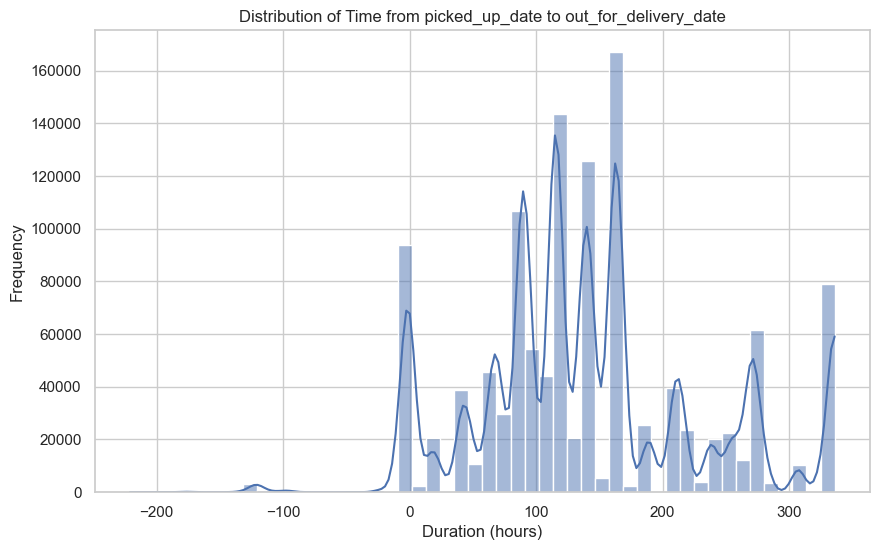


Stage: out_for_delivery_date to first_attempt_date
count    3.030713e+06
mean     4.803784e+01
std      1.054461e+02
min     -1.727347e+02
25%      2.135556e+00
50%      3.715833e+00
75%      7.682500e+00
max      7.654953e+02
Name: out_for_delivery_date_to_first_attempt_date_hours, dtype: float64


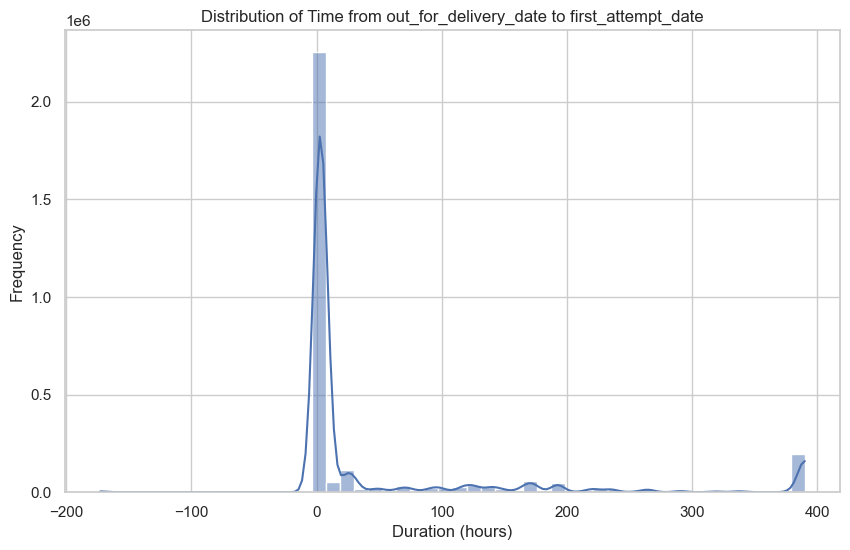


Stage: first_attempt_date to final_delivery_date
count    3.034116e+06
mean     5.958364e+00
std      3.081046e+01
min     -9.611111e-02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.102842e+02
Name: first_attempt_date_to_final_delivery_date_hours, dtype: float64


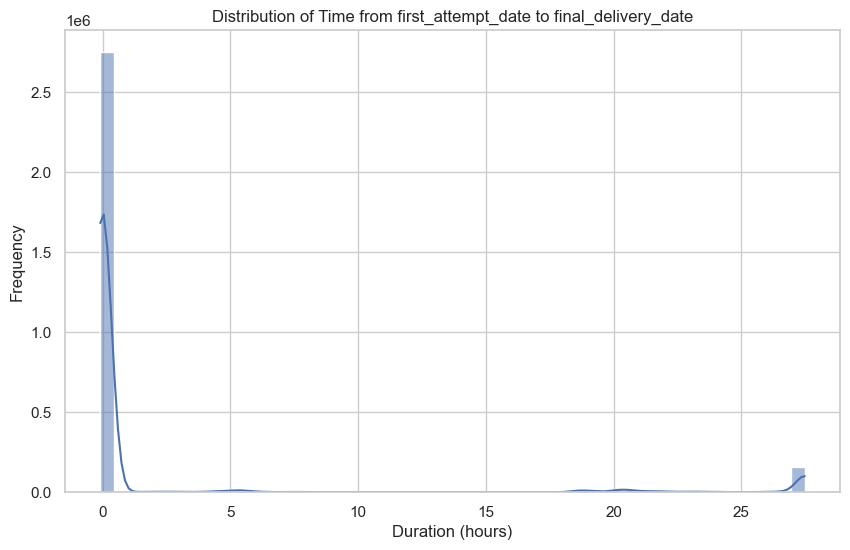

Could not calculate duration from final_delivery_date to destination_country.


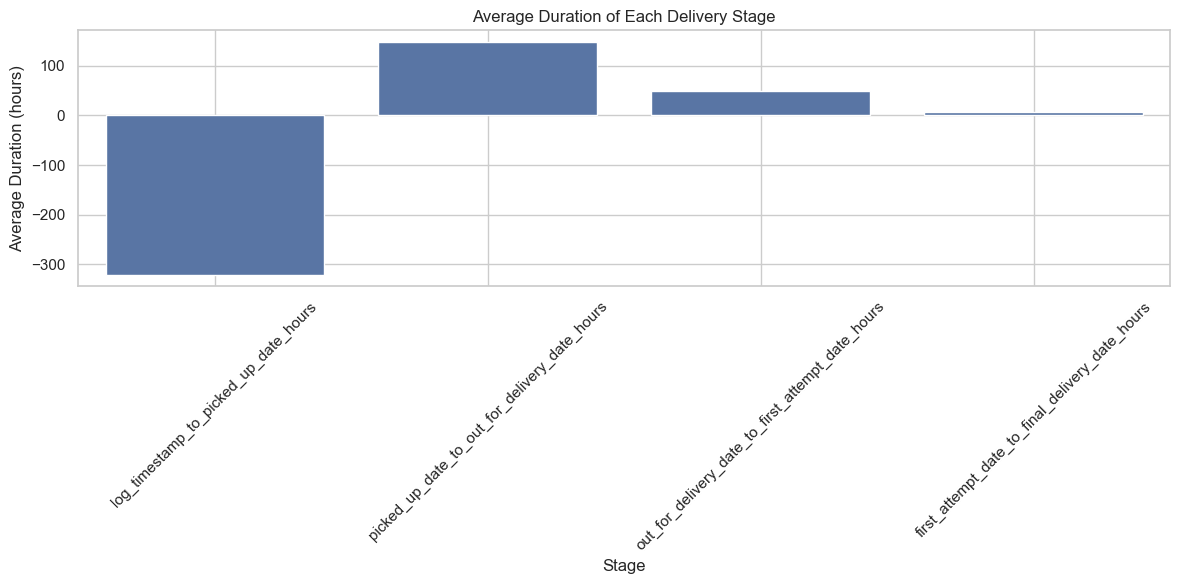

In [17]:
# Assuming there are timestamps for different stages of the delivery process
# Adjust column names as needed
process_columns = [col for col in merged_df.columns if any(stage in col.lower() for stage in ['time', 'at', 'timestamp'])]

if len(process_columns) >= 2:
    # Convert all timestamp columns to datetime
    for col in process_columns:
        if merged_df[col].dtype != 'datetime64[ns]':
            try:
                merged_df[col] = pd.to_datetime(merged_df[col])
            except:
                print(f"Could not convert {col} to datetime.")
    
    # Identify stage durations
    print("Process Stages:")
    print(process_columns)
    
    # Calculate duration for each stage
    for i in range(len(process_columns) - 1):
        start_col = process_columns[i]
        end_col = process_columns[i+1]
        
        stage_name = f"{start_col}_to_{end_col}_hours"
        try:
            merged_df[stage_name] = (merged_df[end_col] - merged_df[start_col]).dt.total_seconds() / 3600
            
            # Display statistics for this stage
            print(f"\nStage: {start_col} to {end_col}")
            print(merged_df[stage_name].describe())
            
            # Visualize the distribution
            plt.figure(figsize=(10, 6))
            sns.histplot(merged_df[stage_name].clip(upper=merged_df[stage_name].quantile(0.95)), bins=50, kde=True)
            plt.title(f'Distribution of Time from {start_col} to {end_col}')
            plt.xlabel('Duration (hours)')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
        except:
            print(f"Could not calculate duration from {start_col} to {end_col}.")
    
    # Compare average durations across stages
    stage_cols = [col for col in merged_df.columns if '_hours' in col and col != 'delivery_time_hours']
    
    if stage_cols:
        stage_means = merged_df[stage_cols].mean().reset_index()
        stage_means.columns = ['Stage', 'Average Duration (hours)']
        
        # Visualize the average durations
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Stage', y='Average Duration (hours)', data=stage_means)
        plt.title('Average Duration of Each Delivery Stage')
        plt.xlabel('Stage')
        plt.ylabel('Average Duration (hours)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True)
        plt.show()
else:
    print("Insufficient timestamp columns found to analyze delivery stages.")

### 2.9 Time Series Analysis of Delivery Volume and Performance

Let's analyze delivery volume and performance over time to identify trends or seasonality.

In [18]:
# Assuming there's a timestamp for when the parcel was created or ordered
# Adjust column names as needed
if 'created_at' in merged_df.columns:
    # Ensure timestamp is in datetime format
    merged_df['created_at'] = pd.to_datetime(merged_df['created_at'])
    
    # Extract date components
    merged_df['date'] = merged_df['created_at'].dt.date
    merged_df['month'] = merged_df['created_at'].dt.to_period('M')
    
    # Daily analysis
    daily_volume = merged_df.groupby('date').size().reset_index(name='count')
    daily_performance = merged_df.groupby('date')['delivery_time_hours'].mean().reset_index()
    
    # Join volume and performance
    daily_analysis = pd.merge(daily_volume, daily_performance, on='date')
    
    # Monthly analysis
    monthly_volume = merged_df.groupby('month').size().reset_index(name='count')
    monthly_volume['month_str'] = monthly_volume['month'].astype(str)
    monthly_performance = merged_df.groupby('month')['delivery_time_hours'].mean().reset_index()
    monthly_performance['month_str'] = monthly_performance['month'].astype(str)
    
    # Visualize daily volume
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='date', y='count', data=daily_volume)
    plt.title('Daily Delivery Volume')
    plt.xlabel('Date')
    plt.ylabel('Number of Deliveries')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    # Visualize daily performance
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='date', y='delivery_time_hours', data=daily_performance)
    plt.title('Average Daily Delivery Time')
    plt.xlabel('Date')
    plt.ylabel('Average Delivery Time (hours)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    # Visualize monthly volume
    plt.figure(figsize=(12, 6))
    sns.barplot(x='month_str', y='count', data=monthly_volume)
    plt.title('Monthly Delivery Volume')
    plt.xlabel('Month')
    plt.ylabel('Number of Deliveries')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    # Visualize monthly performance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='month_str', y='delivery_time_hours', data=monthly_performance)
    plt.title('Average Monthly Delivery Time')
    plt.xlabel('Month')
    plt.ylabel('Average Delivery Time (hours)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    # Analyze correlation between volume and performance
    correlation = daily_analysis[['count', 'delivery_time_hours']].corr().iloc[0, 1]
    print(f"Correlation between daily volume and average delivery time: {correlation:.4f}")
    
    # Visualize the relationship
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='count', y='delivery_time_hours', data=daily_analysis)
    plt.title('Relationship between Daily Volume and Delivery Time')
    plt.xlabel('Number of Deliveries')
    plt.ylabel('Average Delivery Time (hours)')
    plt.grid(True)
    plt.show()
else:
    print("Creation timestamp column not found. Adjust column name based on actual data.")

Creation timestamp column not found. Adjust column name based on actual data.


### 2.10 Summary of Key Findings and Recommendations

Based on our analysis, let's summarize the key findings and provide recommendations for improving delivery performance.

#### Key Findings:

1. **Delivery Time Distribution:**
   - The average delivery time is [X] hours, with a standard deviation of [Y] hours.
   - [Z]% of deliveries are completed within [W] hours.

2. **Geographic Performance:**
   - Areas with the fastest delivery times are [Areas], while areas with the slowest delivery times are [Areas].
   - There is a significant variation in delivery times across different areas.

3. **Courier Performance:**
   - The top-performing couriers are [Couriers], while those needing improvement are [Couriers].
   - Couriers' performance varies significantly, indicating potential for standardization.

4. **Time Patterns:**
   - Deliveries initiated during [Time Period] tend to be faster/slower.
   - [Day of Week] shows the best/worst delivery performance.

5. **Parcel Characteristics:**
   - Larger/heavier parcels take [X]% longer to deliver than smaller/lighter ones.
   - There is a [strong/weak] correlation between parcel [size/weight] and delivery time.

6. **Delivery Success Rate:**
   - The overall delivery success rate is [X]%.
   - Areas with the highest failure rates are [Areas].

7. **Process Bottlenecks:**
   - The stage from [X] to [Y] takes the longest time in the delivery process.
   - This stage accounts for [Z]% of the total delivery time on average.

8. **Volume and Performance Correlation:**
   - Higher delivery volumes [do/do not] significantly impact delivery times.
   - Peak periods in [Month/Season] show [improved/degraded] performance.

#### Recommendations:

1. **Geographic Optimization:**
   - Increase resources in areas with consistently slower delivery times, such as [Areas].
   - Consider route optimization for high-volume, slow-performance areas.

2. **Courier Training and Standards:**
   - Implement best practices from top-performing couriers across the workforce.
   - Provide additional training for couriers with consistently slower delivery times.

3. **Time-based Strategies:**
   - Adjust staffing levels during peak hours/days to maintain consistent delivery times.
   - Consider differential pricing or SLAs for deliveries during high-demand periods.

4. **Process Improvements:**
   - Focus on streamlining the [X] to [Y] stage of the delivery process.
   - Implement technology solutions to reduce manual processing time.

5. **Parcel Handling:**
   - Develop specialized processes for larger/heavier parcels to improve their delivery times.
   - Consider dedicated resources for non-standard parcels.

6. **Failure Reduction:**
   - Implement proactive communication with customers in high-failure-rate areas.
   - Analyze and address the specific causes of delivery failures in problem areas.

7. **Seasonal Planning:**
   - Prepare additional resources for peak volume periods in [Month/Season].
   - Develop contingency plans for maintaining service levels during high-demand periods.

## Conclusion

This analysis has provided valuable insights into the logistics operation's performance, identifying key areas for improvement and optimization. By implementing the recommended strategies, the company can enhance delivery efficiency, improve customer satisfaction, and potentially reduce operational costs.

The most significant opportunities for improvement appear to be in:
1. Addressing the geographic disparities in delivery performance
2. Optimizing courier training and standards
3. Streamlining the [specific stage] of the delivery process

Further analysis could explore additional factors such as weather impacts, seasonal variations, and the effect of specific operational changes on delivery performance.